In [1]:
json_file_name = "sg_90k_part1.json"

In [2]:
import json
# Specify the filename of the JSON file
json_file_name = "sg_90k_part1.json"

# Load the JSON file
with open(json_file_name, "r", encoding="utf-8") as f:
    data = json.load(f)


In [3]:
import random

# Sample 5k items from the data list
sampled_data = random.sample(data, k=10000)

# Print the length of the sampled data
print(len(sampled_data))

10000


In [4]:
sampled_data[0]

{'id': 'jgxwmM2',
 'conversations': [{'from': 'human',
   'value': 'make me a chunking system for a Terraria-like game made in Godot using Tilemaps'},
  {'from': 'gpt',
   'value': '<div class="markdown prose w-full break-words dark:prose-invert light"><p>To create a chunking system for a Terraria-like game made in Godot using Tilemaps, you could follow these steps:</p><ol><li>Divide the game world into chunks of a fixed size, such as 16x16 tiles.</li><li>Create a script that generates a Tilemap for each chunk and populates it with tiles based on the chunk\'s coordinates and the game\'s world generation algorithm.</li><li>Use the Tilemap\'s "get_used_rect()" function to determine which chunks contain visible tiles, and only load and render those chunks.</li><li>When the player moves between chunks, unload the previous chunk and load the new one.</li></ol><p>Keep in mind that this is a high-level overview and more specific implementation details may be required.</p></div>'},
  {'from': 

In [5]:
# load the tokenizer
from transformers import (
    AutoTokenizer
)
tokenizer = AutoTokenizer.from_pretrained('facebook/opt-13b')

In [6]:
def get_input_token_len(test_prompt, tokenizer):
    token = tokenizer(test_prompt, return_tensors="pt")['input_ids']
    len_ = token.shape[-1]
    return len_

In [7]:
conversations = [
    i['conversations'] for i in sampled_data
]

In [8]:
conversations[11]

[{'from': 'human', 'value': 'house music'},
 {'from': 'gpt',
  'value': '<div class="markdown prose w-full break-words dark:prose-invert light"><table><thead><tr><th>Keyword Cluster</th><th>Keyword</th><th>Search Intent</th><th>Title</th><th>Meta Description</th></tr></thead><tbody><tr><td>History of House Music</td><td>Evolution of House Music</td><td>Informational</td><td>The Evolution of House Music: From Disco to Techno</td><td>Discover the rich history of house music and how it has evolved over the decades. From its roots in disco to its current forms of techno and deep house. Learn about the key figures and events that shaped this genre of music.</td></tr><tr><td>Popular House Music Artists</td><td>Daft Punk</td><td>Informational</td><td>The Rise of Daft Punk: How the French Duo Revolutionized House Music</td><td>Learn about the rise of the French duo Daft Punk and how they revolutionized the house music scene. Discover their unique sound and how they have influenced other artist

In [9]:
import re
# conversation result
human_inputs = []
for idx, convs in enumerate(conversations):
    conv_ = []
    has_feed_back = False
    for idx_, msg in enumerate(convs):
        if msg['from'] == 'human':
            conv_.append({'human': msg['value']})
        if msg['from'] == 'gpt':
            has_feed_back = True
            split_token = None
            if '<p>' in msg['value']:
                split_token = ('<p>', '</p>')
            elif '<li>' in msg['value']:
                split_token = ('<li>', '</li>')
            if split_token is not None:
                new_msg = msg['value'].split(split_token[0])[1].split(split_token[1])[0]
            else:
                pattern = r'<.*?>(.*?)</.*?>'
                # Use the re.findall() function to extract the text content
                text_content = re.findall(pattern, msg['value'])
                if len(text_content) == 0:
                    new_msg = msg['value']
                else:
                    new_msg = text_content[0]
            conv_.append({'gpt': new_msg})
    if has_feed_back:
        human_inputs.append(conv_)
print(len(human_inputs))

9782


In [10]:
human_inputs[10]

[{'human': 'house music'},
 {'gpt': '<table><thead><tr><th>Keyword Cluster'},
 {'human': 'Subgenres of House Music'},
 {'gpt': '<table><thead><tr><th>Keyword Cluster'},
 {'human': 'write a song about the history of house music'},
 {'gpt': 'Verse 1:\nIt started in the clubs of Chicago\nWith a beat that made you wanna go go\nFrom disco to the new wave sound\nHouse music was taking over the town'},
 {'human': 'with a house song about the vibe in the club'},
 {'gpt': "Verse 1:\nThe lights are low and the bass is high\nThe crowd is feeling the vibe tonight\nWe're dancing to the beat of the drums\nIn the club where the music never stops"},
 {'human': 'best way to promote a house track'},
 {'gpt': 'Promoting a house track can be done through a variety of methods, but some of the most effective include:'},
 {'human': 'get more followers on insta'},
 {'gpt': 'There are several ways to get more followers on Instagram:'},
 {'human': 'how to get routine in your life ?'},
 {'gpt': 'Developing a rou

In [11]:
# count length
pure_length_data = []
for one_conv_human_input in human_inputs:
    prev_length = 0
    for idx_, msg in enumerate(one_conv_human_input):
        value = list(msg.values())[0]
        cur_len = get_input_token_len(value, tokenizer)
        prev_length += cur_len
        if 'human' in msg:
            pure_length_data.append(prev_length)

In [12]:
len(pure_length_data)

79491

In [13]:
pure_length_data[:10]

[21, 55, 108, 171, 217, 272, 310, 362, 426, 500]

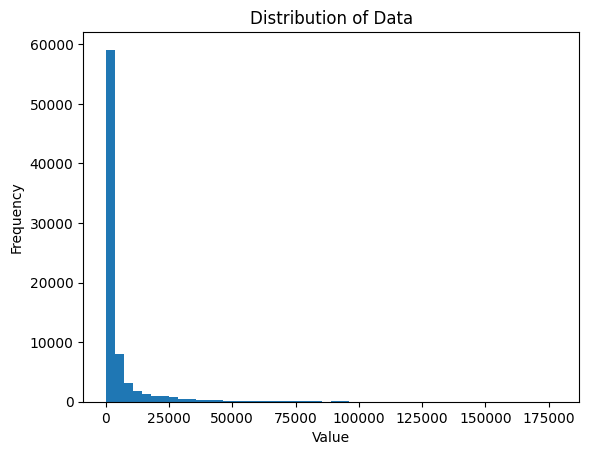

In [14]:
import matplotlib.pyplot as plt

# Example data
data = pure_length_data
# Plot a histogram of the data
plt.hist(data, bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Data")
plt.show()

In [15]:
max(pure_length_data)

178172

In [20]:
interested_ranges = [128, 512, 1024, 2048, max(pure_length_data)]
interested_ranges = sorted(interested_ranges)
# Initialize counters
counts = [0 for i in range(len(interested_ranges))]
# Loop over the values in the list and count how many are less than each threshold
for value in pure_length_data:
    for idx, prompt_length in enumerate(interested_ranges):
        if value < prompt_length:
            counts[idx] += 1
            break # directly pass the value
    

# sum
all_cnt = len(pure_length_data)
for idx, count in enumerate(counts):
    prompt = interested_ranges[idx]
    print(f"Number of values less than {prompt}: {count} ({count/all_cnt:.2%})")

Number of values less than 128: 11284 (14.20%)
Number of values less than 512: 16309 (20.52%)
Number of values less than 1024: 11320 (14.24%)
Number of values less than 2048: 11551 (14.53%)
Number of values less than 178172: 29026 (36.51%)


In [17]:
import numpy as np

# Compute the percentiles
percentile_25 = np.percentile(pure_length_data, 25)
percentile_50 = np.percentile(pure_length_data, 50)
percentile_75 = np.percentile(pure_length_data, 75)

# Print the percentiles
print(f"25th percentile: {percentile_25:.2f}")
print(f"50th percentile: {percentile_50:.2f}")
print(f"75th percentile: {percentile_75:.2f}")

25th percentile: 295.00
50th percentile: 1076.00
75th percentile: 3714.50
